In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision
from torch.autograd import Variable
import torch.nn as nn

In [2]:
from util.data_utils import get_SALICON_datasets

train_data, val_data, test_data = get_SALICON_datasets()

# train_file = 'train_datadict.pickle'
# val_file = 'val_datadict.pickle'
# test_file = 'test_datadict.pickle'

# train_data = get_SALICON_subset(train_file)
# val_data = get_SALICON_subset(val_file)
# train_data = get_SALICON_subset(train_file)

In [ ]:
from util.data_utils import OverfitSampler
from models.DSCLRCN_PyTorch import DSCLRCN
from util.solver import Solver

num_train = 100
train_loader = torch.utils.data.DataLoader(train_data, batch_size=2, shuffle=False, num_workers=4,
                                           sampler=OverfitSampler(num_train))
val_loader = torch.utils.data.DataLoader(val_data, batch_size=2, shuffle=True, num_workers=4)

model = DSCLRCN()
solver = Solver(optim_args={'lr': 1e-3})
solver.train(model, train_loader, val_loader, num_epochs=5, log_nth=100)

Loading weights for VGG16_CNN
Loading weights for PlacesCNN_VGG16
START TRAIN.


In [ ]:
#X = np.random.randn(5, 3, 360, 480).astype(np.float32)
#X_tensor = torch.from_numpy(X.copy())
X_tensor = torch.rand(5, 3, 96, 128)
inputs = Variable(X_tensor)

In [3]:
from models.DSCLRCN_PyTorch import DSCLRCN

full_model = DSCLRCN()
#full_model = full_model.cuda()
outputs = full_model(inputs)
outputs = outputs.squeeze()
outputs.size()

Loading weights for VGG16_CNN
Loading weights for PlacesCNN_VGG16


torch.Size([5, 96, 128])

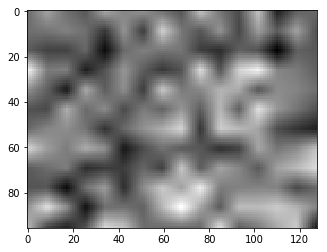

Variable containing:
 1.0000
[torch.FloatTensor of size 1]

In [4]:
import matplotlib.pyplot as plt

x = outputs.data.numpy()
plt.imshow(x[4,:,:],cmap='gray')
plt.show()

torch.sum(outputs[2,:,:].view(96*128))

In [3]:
from models.segmentation_resnet50.segmentation_nn import SegmentationNN

seg_model = SegmentationNN()
outputs = seg_model(inputs)
outputs.size()

Loading weights for net_encoder
torch.Size([5, 2048, 12, 16])


torch.Size([5, 256, 12, 16])

In [4]:
from models.cnn_vgg16.local_cnn import LocalFeatsCNN

LocalFeats_model = LocalFeatsCNN()
outputs = LocalFeats_model(inputs)
outputs.size()

Loading weights for VGG16_CNN


torch.Size([5, 256, 12, 16])

In [16]:
X_tensor = torch.rand(5, 3, 6, 10)
inputs = Variable(X_tensor)
deconv = nn.ConvTranspose2d(3, 16, 7)
deconv(inputs).size()

torch.Size([5, 16, 12, 16])

In [5]:
from models.places_vgg16.places_cnn import PlacesCNN

places_model = PlacesCNN()
outputs = places_model(inputs)
outputs.size()

Loading weights for PlacesCNN_VGG16
torch.Size([5, 512, 3, 4])


torch.Size([5, 256])

In [32]:
vgg16_complete = torchvision.models.vgg16(pretrained=False)
pretrained_dict = vgg16_complete.features.state_dict()

pretrained_dict.update(vgg2)

In [7]:
inputs[:,:,:,].size()

torch.Size([3, 3, 360, 480])

In [26]:
ss = vgg16_complete.state_dict()
for k,v in ss.items():
    print(k)

features.0.weight
features.0.bias
features.2.weight
features.2.bias
features.5.weight
features.5.bias
features.7.weight
features.7.bias
features.10.weight
features.10.bias
features.12.weight
features.12.bias
features.14.weight
features.14.bias
features.17.weight
features.17.bias
features.19.weight
features.19.bias
features.21.weight
features.21.bias
features.24.weight
features.24.bias
features.26.weight
features.26.bias
features.28.weight
features.28.bias
classifier.0.weight
classifier.0.bias
classifier.3.weight
classifier.3.bias
classifier.6.weight
classifier.6.bias


In [9]:
inputs.resize(3,3,20,20).size()

RuntimeError: requested resize to 3x3x20x20 (3600 elements in total), but the given tensor has a size of 3x3x360x480 (1555200 elements). autograd's resize can only change the shape of a given tensor, while preserving the number of elements. 

In [5]:
conv_test = nn.Conv2d(2048, 512, kernel_size=(7, 5), stride=(3, 2), padding=(2, 2))

X = np.random.randn(3, 2048, 45, 60).astype(np.float32)
X_tensor = torch.from_numpy(X.copy())
inputs = Variable(X_tensor)

y = conv_test(inputs)
y.size()

torch.Size([3, 512, 15, 30])

In [4]:
X = np.random.randn(3, 3, 360, 480).astype(np.float32)
X_tensor = torch.from_numpy(X.copy())
inputs = Variable(X_tensor)

In [6]:
nn.Softmax2d?

In [11]:
torch.rand?